In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [3]:
data = pd.read_csv("general_data.csv")

In [4]:
data1 = data[['Attrition','Age','DistanceFromHome','MonthlyIncome','TrainingTimesLastYear','JobLevel','PercentSalaryHike']]

In [5]:
label_encoder = preprocessing.LabelEncoder()

In [6]:
encoded_attrition = label_encoder.fit_transform(data1["Attrition"])

In [7]:
data1["Attrition"] = encoded_attrition

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
data1.head()

,Attrition,Age,DistanceFromHome,MonthlyIncome,TrainingTimesLastYear,JobLevel,PercentSalaryHike
0,0,51,6,131160,6,1,11
1,1,31,10,41890,3,1,23
2,0,32,17,193280,2,4,15
3,0,38,2,83210,5,3,11
4,0,32,10,23420,2,1,12


In [9]:
tree_model = tree.DecisionTreeClassifier()

__Random Forest__

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
data1.columns

Index(['Attrition', 'Age', 'DistanceFromHome', 'MonthlyIncome',
       'TrainingTimesLastYear', 'JobLevel', 'PercentSalaryHike'],
      dtype='object')

In [11]:
rf_model = RandomForestClassifier(n_estimators = 1000,max_features = 2,oob_score=True)

In [22]:
features = ['Age','DistanceFromHome','MonthlyIncome','TrainingTimesLastYear','JobLevel','PercentSalaryHike']

In [23]:
rf_model.fit(X = data1[features],y=data1["Attrition"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [24]:
print(rf_model.oob_score_)

1.0


In [25]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Age 0.22923128819788985
DistanceFromHome 0.1700639275277951
MonthlyIncome 0.30049990992823783
TrainingTimesLastYear 0.08722192243968742
JobLevel 0.07449448387533206
PercentSalaryHike 0.13848846803105772


In [26]:
predictors = pd.DataFrame([data1['MonthlyIncome'],data1['Age'],data1['DistanceFromHome']]).T

In [18]:
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

In [19]:
tree_model.fit(X=predictors, y = data1['Attrition'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
with open("Resultforattrition.dot",'w') as f:
    f = tree.export_graphviz(tree_model,feature_names = ["MonthlyIncome","Age","DistanceFromHome"],out_file = f)

__Dtree__
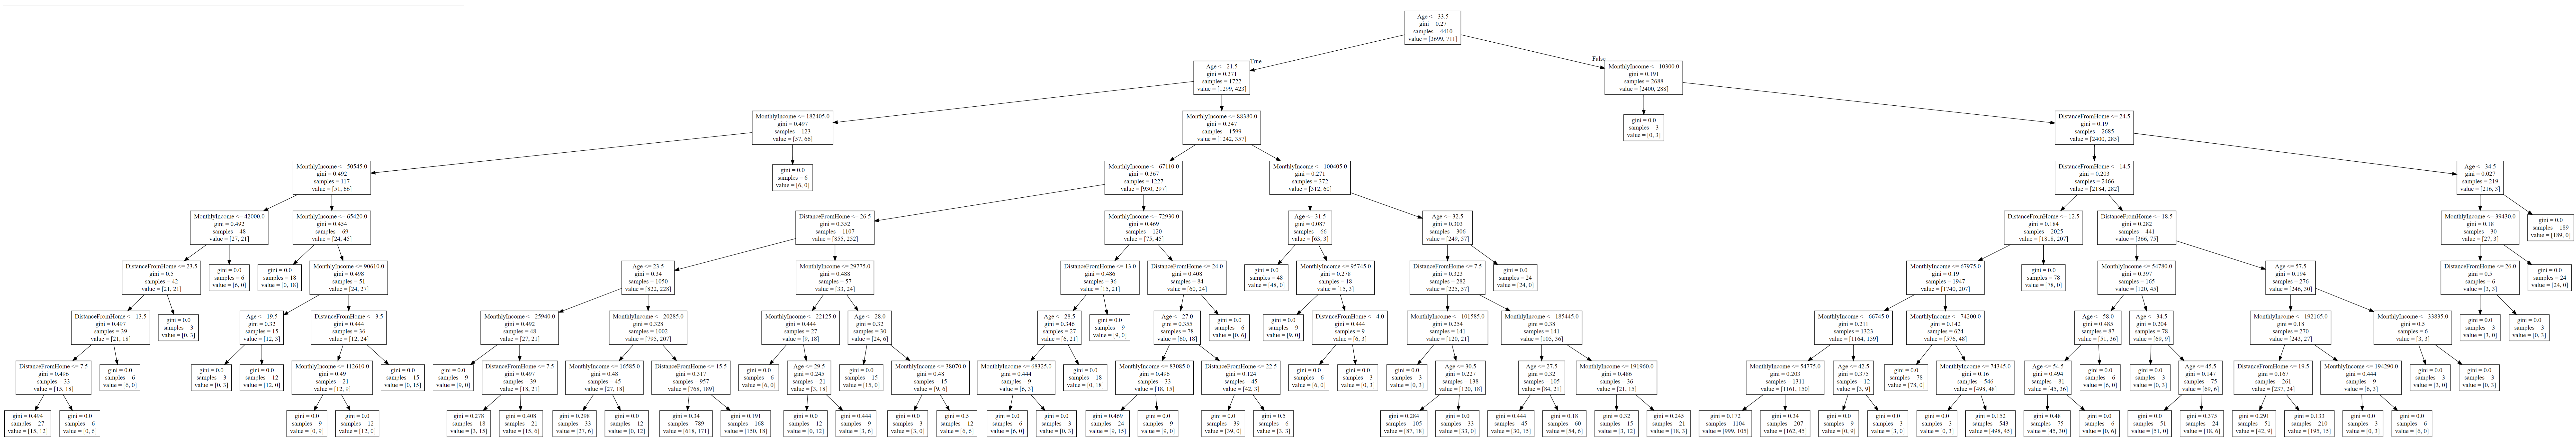

In [21]:
tree_model.score(X = predictors,y = data1["Attrition"])

0.8782312925170068